In [2]:
import pip
from astropy.io import fits
import numpy as np
#%matplotlib widget
import matplotlib.pyplot as plt
from functools import reduce
#import mplcursors
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
import csv

from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
try:
    from reproject import reproject_interp
    print("module 'reproject' is installed")
except ModuleNotFoundError:
    print("module 'reproject' is not installed")
    # or
    pip.main(['install', 'reproject'])
    print('Now installed')

import sys
import glob
from astropy.table import Table
import os
from astropy.table import *
from matplotlib.colors import LogNorm


module 'reproject' is installed


In [3]:
name = glob.glob('*_cont_all_clean_nat.fits')
print(*name)
alma_2744 = fits.open(*name)
alma_data = alma_2744[0].data[0,0,:,:]

Abell370_cont_all_clean_nat.fits


In [4]:
A = pd.read_csv('cont_SN4.0_Stot_crr.list',comment='#',sep='\s+',header=None, index_col=0, usecols=[0, 1, 2, 3, 10, 19, 24], names=['cluster', 'id', 'ra','dec', 'snr', 'flux', 'flux_err'])
name='Abell370'
file = open("../370.txt", "w")

print(A.loc[name])
id_alma = A.loc[name].to_numpy()[:,0].astype(int)
ra_alma = A.loc[name].to_numpy()[:,1].astype(float)
dec_alma = A.loc[name].to_numpy()[:,2].astype(float)
flux_alma = A.loc[name].to_numpy()[:,4].astype(float)
flux_err_alma = A.loc[name].to_numpy()[:,5].astype(float)

           id         ra       dec    snr   flux  flux_err
cluster                                                   
Abell370   18  39.959164 -1.595018  12.91  0.673      0.27
Abell370   22  39.957838 -1.559411   4.35  0.268    -99.99
Abell370   27  39.973071 -1.559793   4.27  0.943      0.34
Abell370   30  39.984783 -1.559902   4.30  0.262    -99.99
Abell370   31  39.976781 -1.560129   5.94  0.584      0.48
Abell370   40  39.960427 -1.562348   4.42  0.305    -99.99
Abell370   55  39.962905 -1.565030   4.06  0.304      0.35
Abell370  103  39.992310 -1.573471   6.80  0.571      0.61
Abell370  110  39.985689 -1.573978  24.90  1.590      0.33
Abell370  118  39.969440 -1.574682   4.00  0.080    -99.99
Abell370  146  39.964350 -1.578208   5.39  0.347      0.32
Abell370  172  39.947398 -1.581406   4.34 -0.174    -99.99
Abell370  174  39.959647 -1.581583   4.12  0.334      0.38
Abell370  202  39.956158 -1.585565   4.16  0.299    -99.99
Abell370  229  39.960881 -1.589971   4.03  0.395      0.

In [5]:
hdulist2=fits.open(*glob.glob('*0136_irac.eazypy.zout.fits'))
hdulist4=fits.open(*glob.glob('*0136_irac_phot_apcorr.fits'))
hdu_ch1=fits.open(*glob.glob('*-f160w_drz_sci.fits'))
hdu_ch2=fits.open(*glob.glob('*-ch1_drz_sci.fits'))
hdu_ch3=fits.open(*glob.glob('*-ch2_drz_sci.fits'))
hdu_wht160w = fits.open(*glob.glob('*-f160w_drz_wht.fits'))
hdu_wht1 = fits.open(*glob.glob('*-ch1_drz_wht.fits'))
hdu_wht2 = fits.open(*glob.glob('*-ch2_drz_wht.fits'))



data2=hdulist2[0].data
header2=hdulist2[0].header

In [6]:
import matplotlib

font = {
        'size'   : 15,
        'family':'Serif',}

matplotlib.rc('font', **font)

In [7]:
data3=hdulist2[1].data
header3=hdulist2[1].header

In [8]:

data4=hdulist4[1].data
header4=hdulist4[1].header

In [9]:
image_wht1 = hdu_wht1[0].data
image_wht2 = hdu_wht2[0].data
image_ch1=hdu_ch1[0].data
image_ch2=hdu_ch2[0].data
image_ch3=hdu_ch3[0].data
image_wht160 = hdu_wht160w[0].data

In [10]:
b_flux = data3['restB']
b_err = data3['restB_err']
u_flux = data3['restU']
u_err = data3['restU_err']
v_flux = data3['restV']
v_err = data3['restV_err']
j_flux = data3['restJ']
j_err = data3['restJ_err']
z = data3['z_phot']
Av = data3['Av']
num = data3['nusefilt']
sfr = data3['SFR']
hband_flux = data4['f160w_tot_1']
hband_err = data4['f160w_etot_1']
irac_ch1_flux = data4['irac_ch1_flux']
irac_ch2_flux = data4['irac_ch2_flux']
irac_ch1_err = data4['irac_ch1_err']
irac_ch2_err = data4['irac_ch2_err']
mass = data3['mass']
flag = data4['flag_aper_1']
bright = data4['irac_ch1_bright']
#chi2 = data3['raw_chi2']
z_16 = data3['z160']
z_84 = data3['z840']

coor_positive = np.where((b_flux>0) & (u_flux>0) & (v_flux>0) & (j_flux>0) & (hband_flux>0))

b_flux = b_flux[coor_positive]
b_err = b_err[coor_positive]
u_flux = u_flux[coor_positive]
u_err = u_err[coor_positive]
v_flux = v_flux[coor_positive]
v_err = v_err[coor_positive]
j_flux = j_flux[coor_positive]
j_err = j_err[coor_positive]
z = z[coor_positive]
Av = Av[coor_positive]
num = num[coor_positive]
sfr = sfr[coor_positive]
hband_flux = hband_flux[coor_positive]
hband_err = hband_err[coor_positive]
irac_ch1_flux = irac_ch1_flux[coor_positive]
irac_ch1_err = irac_ch1_err[coor_positive]
irac_ch1_flux = irac_ch2_flux[coor_positive]
irac_ch1_err = irac_ch2_err[coor_positive]
flag = flag[coor_positive]
hband_snr = hband_flux / hband_err
irac_ch1_snr = irac_ch1_flux / irac_ch1_err
irac_ch2_snr = irac_ch2_flux / irac_ch2_err
bright = bright[coor_positive]
#chi2 = chi2[coor_positive]
mass = mass[coor_positive]
ra = data3['ra'][coor_positive]
dec = data3['dec'][coor_positive]
z_16 = data3[coor_positive]
z_84 = data3[coor_positive]
print(z[0])

# z_16 and z_84 are FITSrec object and have .columns attribute
z_84 = z_84.columns['z840'].array[coor_positive]
z_16 = z_16.columns['z160'].array[coor_positive]
print(np.where(z_16>0.408))


#print(z_84)

idx = data3['id'][coor_positive]

0.51466936
(array([    1,     2,     3, ..., 15982, 15984, 15985]),)


In [10]:
y1 = 1.3
x1 = 1.6

flag=2
if flag==1:
    redshift='1.0<z<2.0'
    const = 0.49
elif flag==2:
    redshift='0.5<z<1.0'
    const = 0.59
elif flag==3:
    redshift='0<z<0.5'
    const = 0.69
    
x2 = (y1 - const) / 0.88
x = np.linspace(x1, x2, 100)
x_2 = np.linspace(0, x2, 100)
y_2 = np.ones(x_2.size)*y1
y = 0.88*x + const
y_3 = 0.88*x1 + const
y_4 = np.linspace(y_3, 4, 100)
x_4 = np.ones(y_4.size)*x1

#====================================== Create color-color terms ==========================================================
U = -2.5 * np.log10(u_flux) + 23.9 # * 1e-29 / 1.79e-20)  # / 0.77e-14 * 1e26)  erg/cm^2 --> J/m^2 --> uJy
U_err = 0.434 * u_err / u_flux * 2.5
B = -2.5 * np.log10(b_flux) + 23.9 # * 1e-29 / 4.063e-20) # / -0.12e-14 * 1e26)
B_err = 0.434 * b_err / b_flux * 2.5
V = -2.5 * np.log10(v_flux) + 23.9 #* 1e-29 / 2.636e-20)
V_err = 0.434 * v_err / v_flux * 2.5
J = -2.5 * np.log10(j_flux) + 23.9 # * 1e-29 / 1.589e-20)# / 0.899e-14 * 1e26)
J_err = 0.434 * j_err / j_flux * 2.5
H = -2.5 * np.log10(hband_flux) + 23.9

UB = U - B
ub_err = np.sqrt(U_err**2 + B_err**2)
BV = B - V
bv_err = np.sqrt(V_err**2 + B_err**2)
VJ = V - J
vj_err = np.sqrt(V_err**2 + J_err**2)
UV = U - V
uv_err = np.sqrt(U_err**2 + V_err**2)

uv_snr = UV / uv_err
vj_snr = VJ / vj_err
#====================================== different criteria =================================================
# 

# adjust the range of redshift
z1=z

coor_z = np.where((z>0) & (z<3))

# coordinates of points with filters > n
coor_nfilter = np.where(num>7)
coor_hband = np.where((hband_snr>3) )
coor_irac_ch1 = np.where(irac_ch1_snr>3)
coor_irac_ch2 = np.where(irac_ch2_snr>3)
coor_flag = np.where(flag==0)
logmass = np.log10(mass)
coor_mass = np.where((logmass>9) & (logmass<11))
#coor_chi2 = np.where(chi2<10)
# choose galaxies with good SNR
good = np.where((uv_snr>0) & (vj_snr>0) )
#select out galaxies decoupling from the cluster, by redshift

coor_behind = np.where((z_16 > 0.408))
coor_before = np.where(z_84<0.208)


final = reduce(np.intersect1d,(coor_nfilter, good, coor_z, coor_irac_ch1, coor_irac_ch2))

In [11]:
c = SkyCoord(ra*u.deg, dec*u.deg)
catalog = SkyCoord(ra_alma*u.deg, dec_alma*u.deg)
idxx, d2d, d3d = catalog.match_to_catalog_sky(c)
idxx = idxx[d2d.arcsec<1]
print(idxx)
final_alma = reduce(np.intersect1d,(final, idxx))

id_detected = id_alma[d2d.arcsec<1]
ra_detected = ra_alma[d2d.arcsec<1]
dec_detected = dec_alma[d2d.arcsec<1]
d2d = d2d.arcsec[d2d.arcsec<1]
print(d2d)


[ 2636  4072 14325  4138 14133  3593  3607 12675  3408 11483]
[0.1470081  0.61084849 0.73864982 0.40517992 0.57043122 0.10414476
 0.06744592 0.74441149 0.23259307 0.90778622]


In [12]:

#========================================== ALMA detected objects ===========================================

def matching(redshift, catlog1_ra, catlog1_dec, catlog2_ra, catlog2_dec, intended_sep=1, id_alma=id_alma): # catlog2 = ALMA, in this case
    coor_hst=[]
    ra_detected=[]
    dec_detected=[]
    id_alma_detected=[]
    delta_ra=[]
    id_detected=[]
    delta_dec=[]
    z=[]
    separation = []
    for i in range(catlog2_ra.size):
        c1 = SkyCoord(catlog1_ra*u.deg, catlog1_dec*u.deg, frame='fk5')
        c2 = SkyCoord(catlog2_ra[i]*u.deg, catlog2_dec[i]*u.deg, frame='fk5')
        sep = c1.separation(c2)
        sep1 = sep.arcsecond
        detected = catlog1_ra[np.where(sep1 < intended_sep)] # find corresponding objects in HST catalogue
        sep1 = sep1[np.where(sep1 < intended_sep)]
        if detected.size>0:
            if detected.size>1:        # if more than one objects found in catalogue, 
                a = np.argmin(sep1)     # select out the one with smallest separation.
                detected = detected[a]
                sep1 = sep1[a]
            index=np.where(catlog1_ra==detected)  # index of this object
            'if int(*c) in final:   # check if the object fufill those cuts above'
            id_alma_detected=np.append(id_alma_detected, id_alma[i])
            coor_hst=np.append(coor_hst, int(*index))
            ra_detected=np.append(ra_detected, ra_alma[i])
            z=np.append(z, redshift[i])
            dec_detected=np.append(dec_detected, dec_alma[i])
            id_detected=np.append(id_detected, id_alma[i])
            delta_ra = np.append(delta_ra, catlog1_ra[index] - ra_alma[i])
            delta_dec = np.append(delta_dec, catlog1_dec[index] - dec_alma[i])
            separation = np.append(separation, sep1)
        else:
            continue
    print(ra_detected)
    coor_hst = coor_hst.astype(int)
    return id_alma_detected.astype('int64'), ra_detected, dec_detected, separation, coor_hst, catlog1_ra[coor_hst], catlog1_dec[coor_hst], z, delta_ra, delta_dec


id_detected, ra_detected, dec_detected, d2d, idxx, c1_ra, c1_dec, z_alma, delta_ra, delta_dec = matching(z, ra, dec, 
                                                                                                         ra_alma, 
                                                                                                         dec_alma)

print(idxx)


for w in range(z_alma.size):
    file1 = open('../rest frame_wavelengths/a370/'+id_alma[w].astype('str')+ '_' + '{:.2f}'.format(z_alma[w]) +'_'  + '{:.2f}'.format(z_16[idxx][w]) + '_' + '{:.2f}'.format(z_16[idxx][w]) +'_flux.txt', 'w')
    writer = csv.writer(file1, delimiter=' ')
    writer.writerow(['# wavelength [um]', 'flux [uJy]', 'flux_err'])
    writer.writerow(['0.36', u_flux[idxx][w], 1])
    writer.writerow(['0.54', v_flux[idxx][w], 1])
    writer.writerow(['1.25', j_flux[idxx][w], 1])
    writer.writerow(['{:.3f}'.format(1.2/(z_alma[w] + 1)*1e3), flux_alma[w], flux_err_alma[w]])
                     
file1.close()


[39.9591641 39.9730709 39.9847832 39.976781  39.960427  39.9923102
 39.985689  39.9694404 39.9643502 39.9561575]
[ 2636  4072 14325  4138 14133  3593  3607 12675  3408 11483]


In [18]:
print(VJ[idxx])
print(id_detected)
print('set difference: ',np.setdiff1d(id_alma, id_detected))

[ 1.3331776   0.33878708 -0.31874657  1.7316914   0.49061394  1.3394623
  1.9127178   1.2315178   2.0387192   1.0944157 ]
[ 18  27  30  31  40 103 110 118 146 202]
set difference:  [ 22  55 172 174 229 242 255]


[ 1.3331776   0.33878708 -0.31874657  1.7316914   0.49061394  1.3394623
  1.9127178   1.2315178   2.0387192   1.0944157 ]


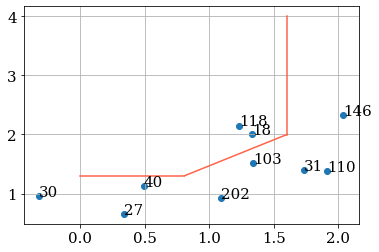

In [14]:
color='tomato'
fig,ax=plt.subplots()


ax.plot(x, y, color=color, label=redshift)
ax.plot(x_2 ,y_2, color=color)
ax.plot(x_4, y_4, color=color)
#plt.axes.xaxis.set_visible(False)
#plt.axes.yaxis.set_visible(False)
ax.scatter(VJ[idxx], UV[idxx])
'''
for i in range(id_detected.size):
    ax.text(VJ[idxx][i], UV[idxx][i]+0.2, id_detected[i])
    '''
for i, txt in enumerate(id_detected):
    plt.annotate(txt, (VJ[idxx][i], UV[idxx][i]))
ax.grid()
print(VJ[idxx])

Text(0, 0.5, '$\\Delta$DEC / arcsec')

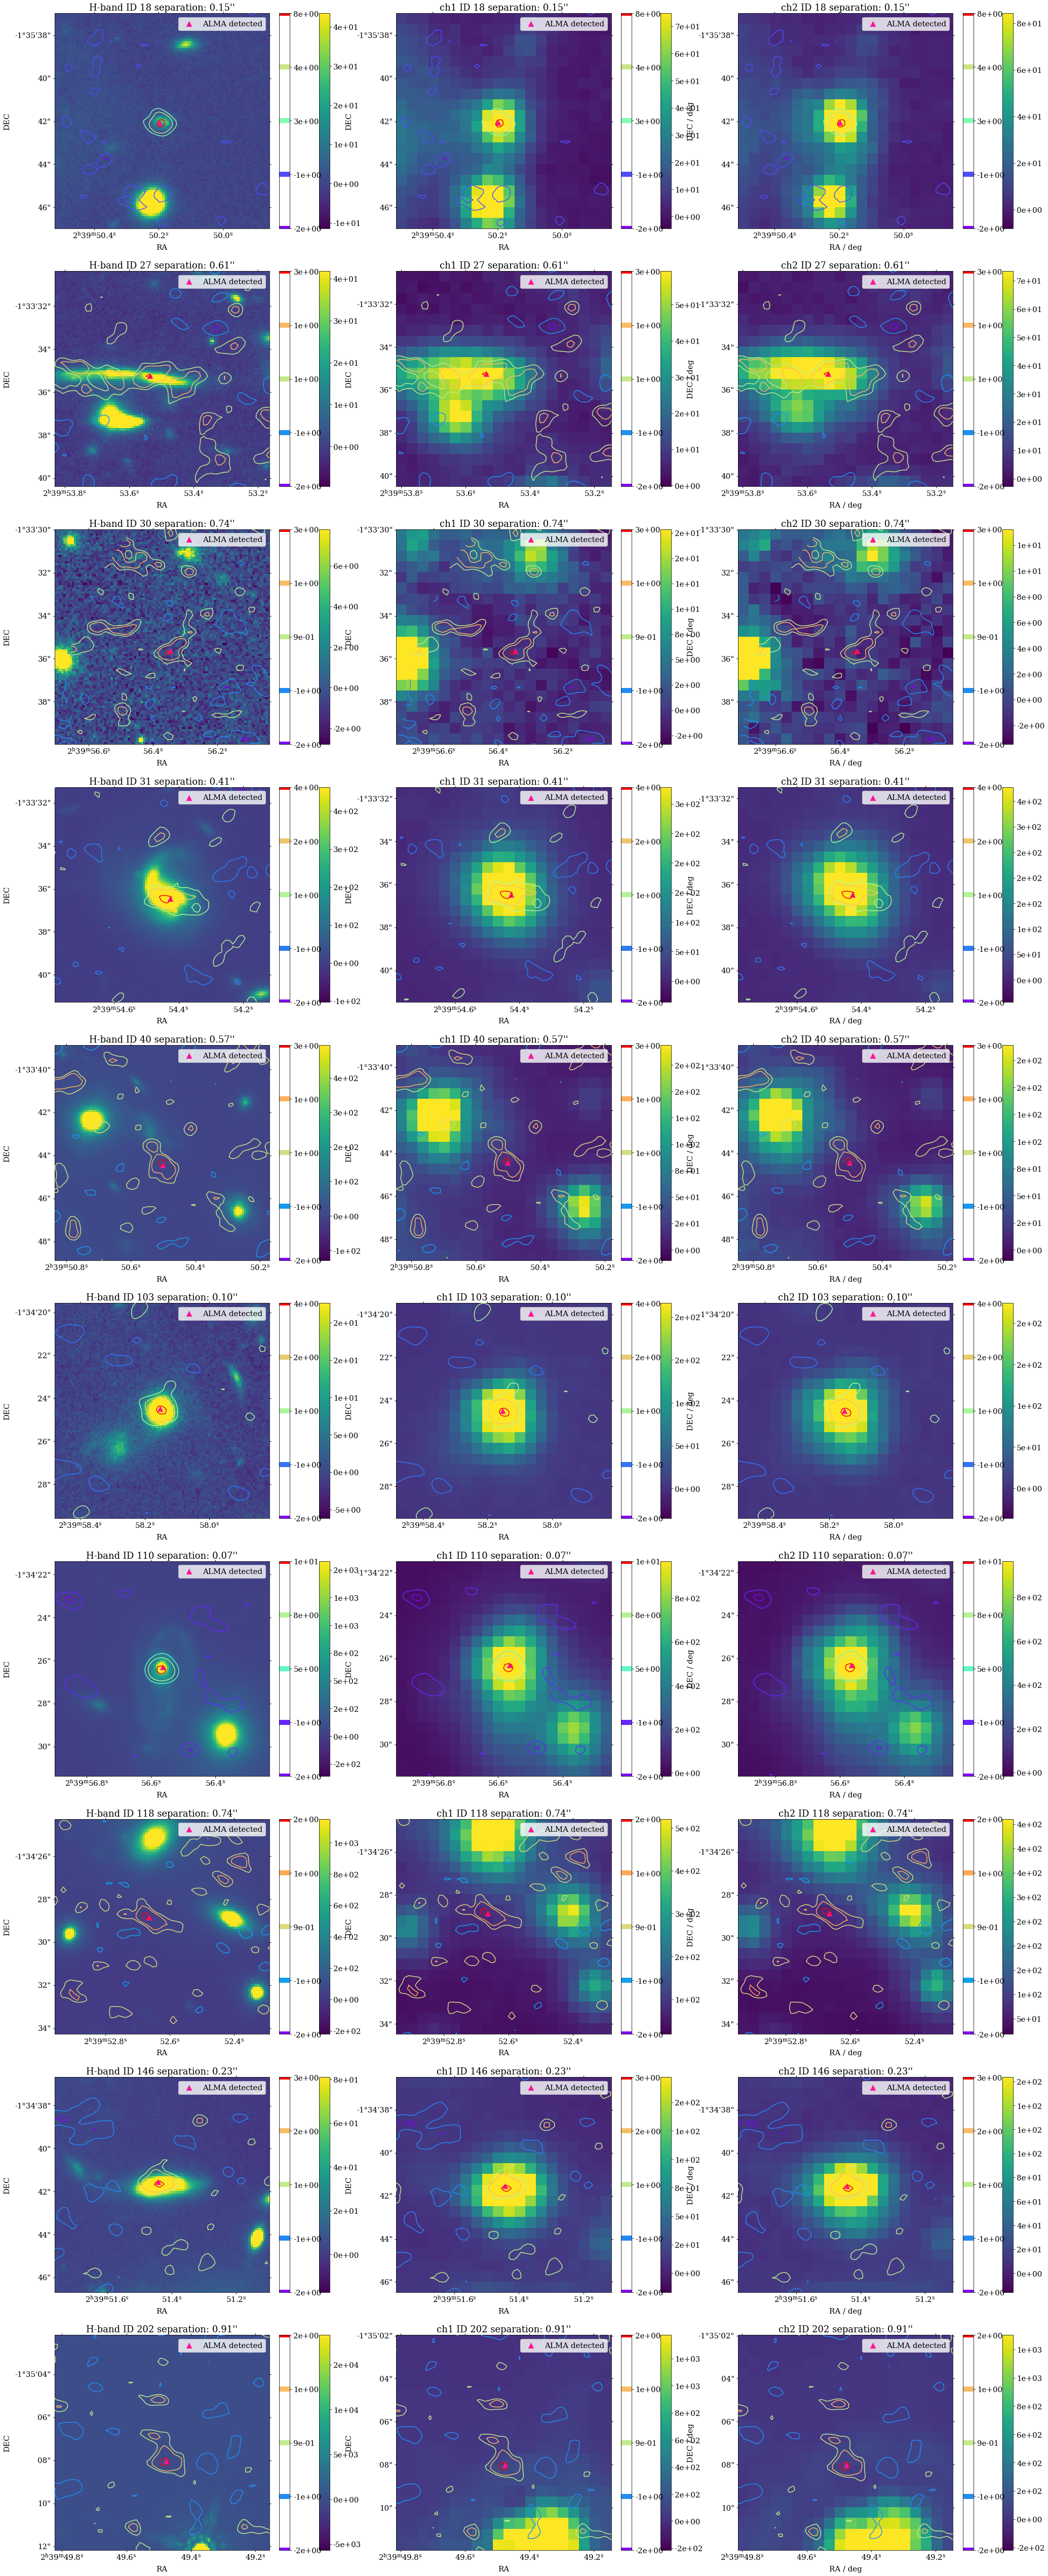

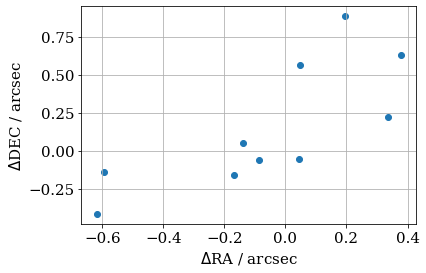

In [16]:

fig, axes = plt.subplots(figsize=(27, c1_ra.size*7))
axes.axis('off')
fig.tight_layout()
delta_ra=[]
delta_dec=[]



for i in range(c1_ra.size):
    num=i
    ra1=c1_ra[num]
    dec1=c1_dec[num]
    #Define a position
    position=SkyCoord(ra1, dec1,unit='deg',frame='icrs')
    size=10*u.arcsec
    size2=15*u.arcsec
    #Create a cutout around the position in all mosaics
    
    position2=SkyCoord(ra_detected[num], dec_detected[num],unit='deg',frame='icrs')
    wcs=WCS(alma_2744[0].header)
    #use wcs.celestial to drop the third dimension of WCS
    cut_alma=Cutout2D(alma_data,position2,size2,wcs=wcs.celestial)

    wcs=WCS(hdu_ch1[0].header)
    cut=Cutout2D(image_ch1,position,size,wcs=wcs)
    wcs=WCS(hdu_wht160w[0].header)
    cut_wht160=Cutout2D(image_wht160,position,size,wcs=wcs)
    
    levels=[np.nanmin(cut_alma.data/(69.7*1e-6))/1.1, np.nanmin(cut_alma.data/(69.7*1e-6))/2, 
            np.nanmax(cut_alma.data/(69.7*1e-6))/3 ,np.nanmax(cut_alma.data/(69.7*1e-6))/2, np.nanmax(cut_alma.data/(69.7*1e-6))/1.1 ]
    
    ax = fig.add_subplot(c1_ra.size, 3 ,3*i+1, projection=cut.wcs)
    m, s = np.mean(cut.data*np.sqrt(cut_wht160.data)), np.std(cut.data*np.sqrt(cut_wht160.data))
    im=ax.imshow(cut.data*np.sqrt(cut_wht160.data), origin='lower', vmin=m-s, vmax=m+3*s)
    ax.scatter(ra_detected[num], dec_detected[num], transform=ax.get_transform('fk5'), marker='^', c='deeppink', s=100, label='ALMA detected')
    ct=ax.contour(cut_alma.data/(69.7*1e-6), transform=ax.get_transform(cut_alma.wcs), cmap=color, levels=levels)
    #ax.scatter(Angle(ra_detected[num], unit=u.deg).hms, Angle(dec_detected[num], unit=u.deg).hms, marker='^', c='red', s=100, label='ALMA detected', transform=ax.get_transform('icrs'))
    ax.set_title('H-band ID '+str(id_detected.astype(int)[num]) + ' separation: '+ '{:.2f}'.format(d2d[num]) + '\'\'')
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, format='%.0e',fraction=0.046, pad=0.1)
    '''
    norm = mpl.colors.BoundaryNorm(levels, ct.cmap.N, extend='max')
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=ct.cmap), ticks=levels, format='%.0e')
    '''
    #cax1 = divider.append_axes("right", size="5%", pad=0.97)
    cb=plt.colorbar(ct, format='%.0e',fraction=0.046, pad=0.01)
    cb.lines[0].set_linewidth(10)
    ax.legend()
    
    # weighted image = 1 / (sigma)^2 --> sigma = 1 / sqrt(w) ∴ snr = signal / noise = signal * sqrt(weighted image)
    
    wcs=WCS(hdu_ch2[0].header)
    cut=Cutout2D(image_ch2,position,size,wcs=wcs)
    wcs=WCS(hdu_wht1[0].header)
    cut_wht1=Cutout2D(image_wht1,position,size,wcs=wcs)
    
    levels=[np.nanmin(cut_alma.data/(69.7*1e-6))/1.1, np.nanmin(cut_alma.data/(69.7*1e-6))/2, 
            np.nanmax(cut_alma.data/(69.7*1e-6))/3 ,np.nanmax(cut_alma.data/(69.7*1e-6))/2, np.nanmax(cut_alma.data/(69.7*1e-6))/1.1 ]
    
    ax = fig.add_subplot(c1_ra.size, 3 ,3*i+2, projection=cut.wcs)
    m, s = np.mean(cut.data*np.sqrt(cut_wht1.data)), np.std(cut.data*np.sqrt(cut_wht1.data))
    im=ax.imshow(cut.data*np.sqrt(cut_wht1.data), origin='lower', vmin=m-s, vmax=m+3*s)
    ax.set_autoscale_on(False)
    ax.scatter(ra_detected[num], dec_detected[num], transform=ax.get_transform('fk5'), marker='^', c='deeppink', s=100, label='ALMA detected')
    ct=ax.contour(cut_alma.data/(69.7*1e-6), transform=ax.get_transform(cut_alma.wcs), cmap=color, levels=levels)
    #ax.scatter(Angle(ra_detected[num], unit=u.deg).hms, Angle(dec_detected[num], unit=u.deg).hms, marker='^', c='red', s=100, label='ALMA detected', transform=ax.get_transform('icrs'))
    ax.set_title('ch1 ID '+str(id_detected.astype(int)[num]) + ' separation: '+ '{:.2f}'.format(d2d[num]) + '\'\'')
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, format='%.0e',fraction=0.046, pad=0.1)
    '''
    norm = mpl.colors.BoundaryNorm(levels, ct.cmap.N, extend='max')
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=ct.cmap), ticks=levels, format='%.0e')
    '''
    #cax1 = divider.append_axes("right", size="5%", pad=0.97)
    cb=plt.colorbar(ct, format='%.0e',fraction=0.046, pad=0.01)
    cb.lines[0].set_linewidth(10)
    ax.legend()


    wcs=WCS((hdu_ch2[0].header))
    cut=Cutout2D(image_ch3,position,size,wcs=wcs)
    ax = fig.add_subplot(c1_ra.size,3 ,3*i+3, projection=cut.wcs)
    wcs=WCS((hdu_wht2[0].header))
    cut_ch2=Cutout2D(image_wht2,position,size,wcs=wcs)
    m, s = np.mean(cut.data*np.sqrt(cut_ch2.data)), np.std(cut.data*np.sqrt(cut_ch2.data))
    im=ax.imshow(cut.data*np.sqrt(cut_ch2.data), origin='lower', vmin=m-s, vmax=m+3*s)
    ax.set_autoscale_on(False)
    ax.scatter(ra_detected[num], dec_detected[num], transform=ax.get_transform('fk5'), marker='^', c='deeppink', s=100, label='ALMA detected')
    ct=ax.contour(cut_alma.data/(69.7*1e-6), transform=ax.get_transform(cut_alma.wcs), levels=levels, cmap=color)
    ax.set_title('ch2 ID '+str(id_detected.astype(int)[num]) + ' separation: '+ '{:.2f}'.format(d2d[num]) + '\'\'')
    ax.set_xlabel('RA / deg')
    ax.set_ylabel('DEC / deg')
    divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, format='%.0e',fraction=0.046, pad=0.1)
    '''
    norm = mpl.colors.BoundaryNorm(levels, ct.cmap.N, extend='max')
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=ct.cmap), ticks=levels, format='%.0e')
    '''
    #cax1 = divider.append_axes("right", size="5%", pad=0.97)
    cb=plt.colorbar(ct, format='%.0e',fraction=0.046, pad=0.01)
    cb.lines[0].set_linewidth(10)
    ax.legend()
    
    delta_ra = np.append(delta_ra, ra1 - ra_detected[num])
    delta_dec = np.append(delta_dec, dec1 - dec_detected[num])
'''
for row, big_ax in enumerate(axes, start=1):
    big_ax[0].set_title("Subplot row %s \n" % row, fontsize=16)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    #big_ax[0].tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax[0]._frameon = False
    '''


plt.figure()
plt.scatter(delta_ra*3600, delta_dec*3600)
#plt.xlim(-0.5,0.5)
#plt.ylim(-0.5,0.5)
plt.grid()
plt.xlabel(r'$\Delta$RA / arcsec')
plt.ylabel(r'$\Delta$DEC / arcsec')
#Use this if you input image is in multiple dimensions

#image=hdu[idx].data
#wcs=WCS((hdu[idx].header))
#cut=Cutout2D(image,position,size,wcs=wcs)
#ax.imshow(cut.data,vmin=vm[0],vmax=vm[1],cmap=cmap,origin='lower')

In [17]:
# 'w' = overwrite, 'a' = append
writer = csv.writer(file, delimiter=' ')

delta_ra = delta_ra * 3600
delta_dec = delta_dec * 3600

for w in range(delta_ra.size):
    writer.writerow([delta_ra[w], delta_dec[w]])

file.close()